# Compresive Strength Concrete Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [2]:
concrete_strength = pd.read_csv('compresive_strength_concrete.csv')
concrete_strength.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Check the shape of data

In [3]:
print(f'Shape of concrete Strength: {concrete_strength.shape}')

Shape of concrete Strength: (1030, 9)


In [24]:
concrete_strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

# check null values

In [25]:
concrete_strength.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

# check duplicate rows

In [41]:
concrete_strength.duplicated().sum()

25

# `There are 25 rows which are duplicated`
# Remove them

In [42]:
concrete_strength.drop_duplicates(inplace = True)

# now again check the shape of concrete strength

In [43]:
print(f'Shape of concrete Strength --> {concrete_strength.shape}')

Shape of concrete Strength --> (1005, 9)


# split the columns for input and ouput

In [44]:
data = concrete_strength.loc[:,concrete_strength.columns != 'Concrete compressive strength(MPa, megapascals) ']
target = concrete_strength.loc[:,concrete_strength.columns == 'Concrete compressive strength(MPa, megapascals) ']

In [45]:
print(f'shape of target --> {target.shape} \nshape of data --> {data.shape}')

shape of target --> (1005, 1) 
shape of data --> (1005, 8)


# centeralized the data

In [46]:
mean = data.mean(axis = 0)
data -= mean
std = data.std(axis = 0)
data /= std

# now split the data for training and testing

In [47]:
x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=0.3, random_state=42)

In [48]:
print(f'''shape of x_train --> {x_train.shape}
shape of y_train --> {y_train.shape}
shape of x_test --> {x_test.shape}
shape of test --> {y_test.shape}''')

shape of x_train --> (703, 8)
shape of y_train --> (703, 1)
shape of x_test --> (302, 8)
shape of test --> (302, 1)


In [49]:
type(x_train)

pandas.core.frame.DataFrame

# covert them into array

In [50]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [51]:
type(x_train)

numpy.ndarray

# split x_train for training and validation

In [52]:
partial_x_train = x_train[200:]
partial_y_train = y_train[200:]
x_val = x_train[:200]
y_val = y_train[:200]

# make a model

In [87]:
def build_model():
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (x_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.RMSprop(lr=0.004),
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [90]:
model = build_model()
history = model.fit(partial_x_train, partial_y_train, epochs = 100,batch_size = 1, validation_data = (x_val,y_val))

C:\Users\ashar\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
503/503 [==============================] - 2s 2ms/step - loss: 929.8603 - mae: 25.2837 - val_loss: 423.8294 - val_mae: 15.9200
Epoch 2/100
503/503 [==============================] - 1s 1ms/step - loss: 314.3340 - mae: 13.7467 - val_loss: 173.8135 - val_mae: 10.2944
Epoch 3/100
503/503 [==============================] - 1s 1ms/step - loss: 198.0661 - mae: 10.6901 - val_loss: 163.1886 - val_mae: 9.9170
Epoch 4/100
503/503 [==============================] - ETA: 0s - loss: 172.6190 - mae: 10.04 - 1s 1ms/step - loss: 190.5922 - mae: 10.2520 - val_loss: 190.2631 - val_mae: 9.7118
Epoch 5/100
503/503 [==============================] - 1s 1ms/step - loss: 162.7133 - mae: 9.6321 - val_loss: 167.4626 - val_mae: 9.1708
Epoch 6/100
503/503 [==============================] - 1s 1ms/step - loss: 156.7631 - mae: 9.4284 - val_loss: 142.2316 - val_mae: 8.4364
Epoch 7/100
503/503 [==============================] - 1s 1ms/step - loss: 145.8902 - mae: 9.0043 - val_loss: 128.1115 - val_mae: 8.

Epoch 61/100
503/503 [==============================] - 1s 1ms/step - loss: 74.6037 - mae: 6.3511 - val_loss: 77.0808 - val_mae: 6.4745
Epoch 62/100
503/503 [==============================] - ETA: 0s - loss: 73.9493 - mae: 6.39 - 1s 1ms/step - loss: 73.3480 - mae: 6.3900 - val_loss: 72.7178 - val_mae: 6.3995
Epoch 63/100
503/503 [==============================] - 1s 2ms/step - loss: 71.4997 - mae: 6.3976 - val_loss: 79.6393 - val_mae: 6.7292
Epoch 64/100
503/503 [==============================] - 1s 2ms/step - loss: 75.2181 - mae: 6.3839 - val_loss: 77.0434 - val_mae: 6.5638
Epoch 65/100
503/503 [==============================] - 1s 2ms/step - loss: 71.7149 - mae: 6.2844 - val_loss: 73.5147 - val_mae: 6.5237
Epoch 66/100
503/503 [==============================] - 1s 1ms/step - loss: 76.2682 - mae: 6.4753 - val_loss: 76.7123 - val_mae: 6.5709
Epoch 67/100
503/503 [==============================] - 1s 2ms/step - loss: 69.4793 - mae: 6.1058 - val_loss: 72.1173 - val_mae: 6.4386
Epoch 68/1

In [108]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 89.6099 - mae: 7.4653


[89.60990142822266, 7.465301513671875]

In [112]:
result = model.predict(x_test)
result[1]

array([26.274097], dtype=float32)

# Graphical Representation of loss and mae 

In [92]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [98]:
epochs = range(1, len(history.history['loss']) + 1)

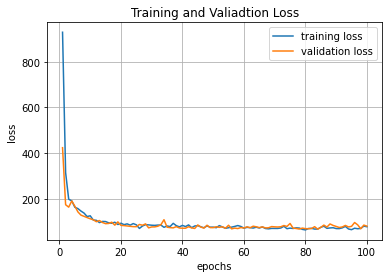

In [106]:
plt.plot(epochs, history.history['loss'], label = 'training loss')
plt.plot(epochs, history.history['val_loss'], label = 'validation loss')
plt.title('Training and Valiadtion Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

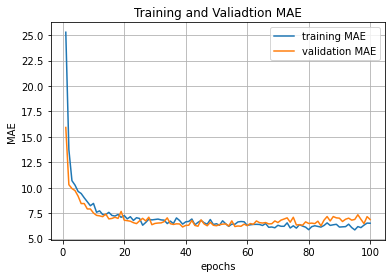

In [107]:
plt.plot(epochs, history.history['mae'], label = 'training MAE')
plt.plot(epochs, history.history['val_mae'], label = 'validation MAE')
plt.title('Training and Valiadtion MAE')
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.show()

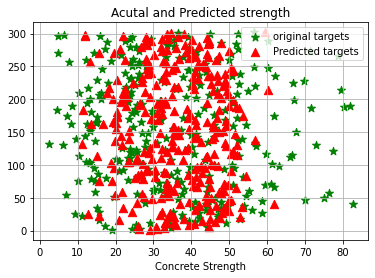

In [135]:
plt.scatter(y_test, range(1, len(y_test)+1), color='green', marker = '*', s=70, label = 'original targets')
plt.scatter(result, range(1, len(y_test)+1), color='red', marker = '^', s=70, label = 'Predicted targets')
plt.title("Acutal and Predicted strength")
plt.xlabel('Concrete Strength')
plt.legend()
plt.grid()
plt.show()

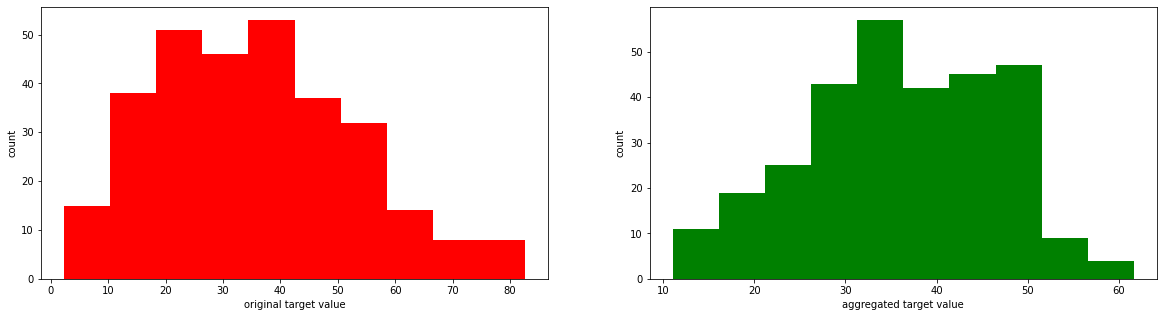

In [139]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test, color = 'red')
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(result, color = 'green')
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()